In [15]:
import numpy as np
from matplotlib import pyplot as plt

import os
import json

In [16]:
def load_data(test_name, scene_name):
	file = open(os.path.join("..", "..", "output", test_name, scene_name, "model", "train_results.json"))
	data = json.load(file)
	file.close()

	return data

test_name = "0807_hair_10"
unpolarized = load_data(test_name, "unpolarized")
indirect = load_data(test_name, "indirect")
direct = load_data(test_name, "direct")

In [17]:
def plot_metric(data, metric, label):
	if type(data[metric]) == list:
		plt.plot(data[metric], label=label)
	else:
		plt.plot(data[metric]["iteration"], data[metric]["value"], label=label)

def plot_graph(unpolarized, indirect, direct, metric):
	plot_metric(unpolarized, metric, "unpolarized")
	plot_metric(indirect, metric, "indirect")
	plot_metric(direct, metric, "direct")

	plt.xlabel("iteration")
	plt.ylabel(metric)
	plt.grid()
	plt.legend()
	plt.show()

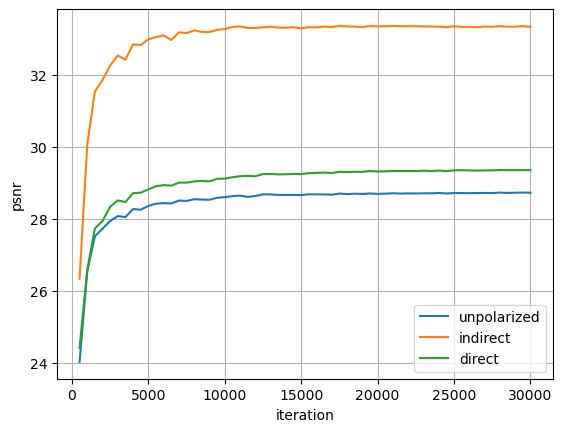

In [18]:
# PSNR
plot_graph(unpolarized, indirect, direct, "psnr")

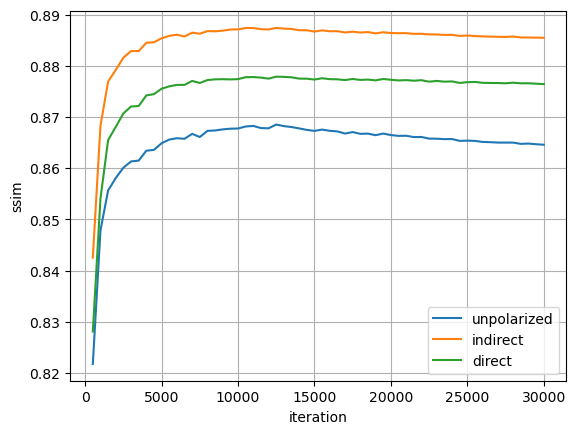

In [19]:
# SSIM
plot_graph(unpolarized, indirect, direct, "ssim")

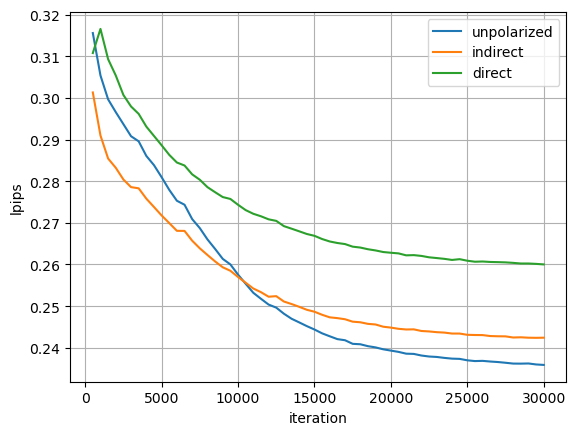

In [20]:
# LPIPS
plot_graph(unpolarized, indirect, direct, "lpips")

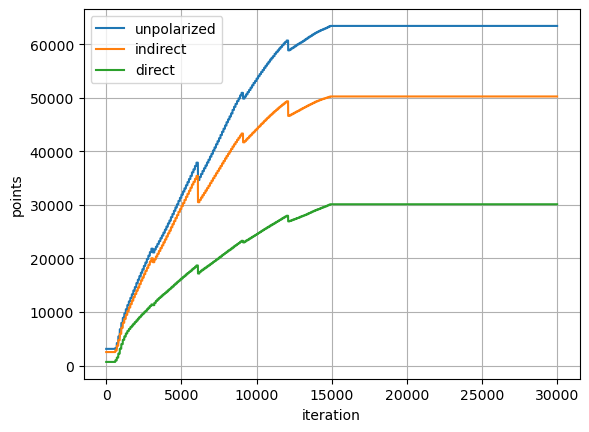

In [21]:
# Total Points
plot_graph(unpolarized, indirect, direct, "points")